<a href="https://colab.research.google.com/github/PratyushaChatterjee/TAI-IP/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Titanic Survival Prediction/train.csv')
data1 = pd.read_csv('/content/drive/My Drive/Titanic Survival Prediction/test.csv')
data2 = pd.read_csv('/content/drive/My Drive/Titanic Survival Prediction/gender_submission.csv')

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

In [ ]:
columns=['Ticket','Fare','PassengerId','Name']
data.drop(columns,axis=1,inplace=True)

In [ ]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
data['Age'].fillna(value=data['Age'].mean(),inplace = True)

In [ ]:
data.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [ ]:
data.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


In [ ]:
outliersCount= len(data[(data['Age'] > 55)])
outliersCount

40

In [ ]:
data= data.drop(data[data['Age']>55].index)
data= data.drop(data[data['Age']<0].index)


(array([ 44.,  24.,  32., 131., 106., 303.,  74.,  62.,  41.,  34.]),
 array([ 0.42 ,  5.878, 11.336, 16.794, 22.252, 27.71 , 33.168, 38.626,
        44.084, 49.542, 55.   ]),
 <BarContainer object of 10 artists>)

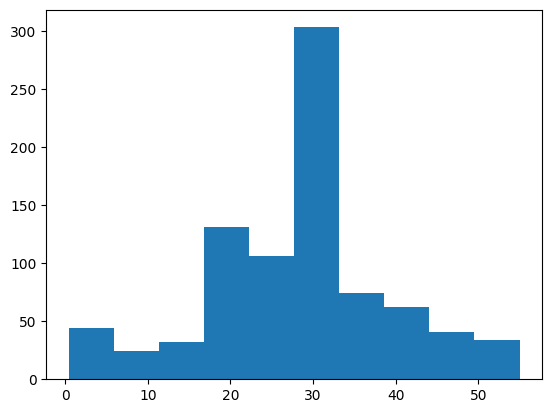

In [ ]:
plt.hist(data['Age'])

In [ ]:
ColEncode=['Pclass'	,'Sex','Embarked']
data=pd.get_dummies(data, columns=ColEncode)
data.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
Y=data['Survived']
data.drop(['Survived'],axis=1,inplace=True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(data)

In [ ]:
pca=PCA(n_components=7)
X_pca=scaler.fit_transform(X_scaled)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.4, random_state=42)

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
classifier =svm.SVC(kernel='rbf')
classifier.fit(x_train,y_train)


SVC()

In [ ]:
y_pred=classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)


Accuracy: 0.8093841642228738


In [ ]:
data1.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,